In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("training_demo.csv")

In [3]:
new_df=df.copy()
new_df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [4]:
for i in df:
    if df.loc[df[i].isnull()].shape[0]>0:
        print("Yes")

In [6]:
df.shape

(4920, 133)

In [5]:
# Total Duplicated Values
df.loc[df.duplicated()].shape

(4616, 133)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(304, 133)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X=df.drop(['prognosis'],axis=1)
X.shape

(304, 132)

In [10]:
Y=df.iloc[:,-1]
Y.shape

(304,)

In [11]:
Y

0      Fungal infection
1      Fungal infection
2      Fungal infection
3      Fungal infection
4      Fungal infection
             ...       
402            Impetigo
403            Impetigo
405            Impetigo
406            Impetigo
407            Impetigo
Name: prognosis, Length: 304, dtype: object

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=41)

In [13]:
training_data=pd.concat([X_train,y_train])
training_data.shape

(424, 133)

In [14]:
training_data.to_csv("training.csv",index_label=False)

In [15]:
testing_data=pd.concat([X_test,y_test])
testing_data.shape

(184, 133)

In [16]:
testing_data.to_csv("testing.csv",index_label=False)

In [18]:
X_train.shape

(212, 132)

In [18]:
X_test.shape

(92, 132)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn_clf=KNeighborsClassifier()

In [19]:
y_train

207                     Hepatitis B
160                     Chicken pox
133    Paralysis (brain hemorrhage)
186                         Typhoid
231                     Hepatitis E
                   ...             
312                  Hypothyroidism
372                            Acne
134    Paralysis (brain hemorrhage)
320                 Hyperthyroidism
120            Cervical spondylosis
Name: prognosis, Length: 212, dtype: object

In [20]:
knn_clf.fit(X_train,y_train)

KNeighborsClassifier()

In [21]:
y_pred=knn_clf.predict(X_test)

In [22]:
y_pred

array(['Psoriasis', 'Hyperthyroidism', 'Varicose veins', 'Hypoglycemia',
       'Varicose veins', 'Paralysis (brain hemorrhage)',
       'Urinary tract infection', 'GERD', 'Dimorphic hemmorhoids(piles)',
       'GERD', 'Common Cold', 'hepatitis A', 'Hepatitis B', 'Dengue',
       'Hepatitis C', 'hepatitis A', 'Hyperthyroidism', 'hepatitis A',
       'Malaria', 'Hypoglycemia', 'Paralysis (brain hemorrhage)',
       'Pneumonia', 'Hepatitis B', 'Hepatitis C', 'Fungal infection',
       'Fungal infection', 'Chicken pox', 'Alcoholic hepatitis',
       'Diabetes ', 'Bronchial Asthma', 'Heart attack', 'Hepatitis B',
       'Hypoglycemia', 'Hepatitis D', 'Chronic cholestasis', 'Jaundice',
       'Allergy', 'Arthritis', 'Osteoarthristis', 'Varicose veins',
       'Malaria', 'Bronchial Asthma', 'Hypoglycemia', 'Tuberculosis',
       'Hypothyroidism', 'Hepatitis D', 'Alcoholic hepatitis',
       'Tuberculosis', 'Hepatitis E', 'Peptic ulcer diseae',
       'Alcoholic hepatitis', 'Impetigo', 'Acne'

In [23]:
# Testing On Training Data
pred=knn_clf.predict(X_train)

In [24]:
pred

array(['Hepatitis B', 'Chicken pox', 'Paralysis (brain hemorrhage)',
       'Typhoid', 'Hepatitis E', 'Hepatitis D', 'Typhoid', 'Typhoid',
       'Varicose veins', 'Hypothyroidism', 'Common Cold', 'Acne',
       'Diabetes ', 'Hypothyroidism', 'Gastroenteritis', 'Chicken pox',
       'Hepatitis C', 'Gastroenteritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Varicose veins',
       'Bronchial Asthma', 'Osteoarthristis', 'AIDS', 'Osteoarthristis',
       'Impetigo', 'Malaria', 'Pneumonia', 'Dengue', 'Arthritis',
       'Migraine', 'Cervical spondylosis', 'Hyperthyroidism',
       'Common Cold', 'Alcoholic hepatitis', 'Chicken pox',
       'Alcoholic hepatitis', 'Chicken pox', 'GERD', 'Psoriasis',
       'Hypertension ', '(vertigo) Paroymsal  Positional Vertigo',
       'Pneumonia', 'Gastroenteritis', 'Hyperthyroidism',
       'Bronchial Asthma', 'Fungal infection', 'Hepatitis B', 'Malaria',
       'AIDS', 'Tuberculosis', 'Migraine', 'Peptic ulcer diseae',
       'Hepatitis D', '

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [26]:
# Train Accuracy
accuracy_score(y_train,pred)

0.9952830188679245

In [27]:
# Test Accuracy
print("Accuracy :",accuracy_score(y_test,y_pred)*100,"%")

Accuracy : 94.56521739130434 %


In [40]:
import json
import numpy as np

In [37]:
def save_json(filepath,X_train,Y_train):
        dict_ = {}
        dict_['X_train'] = X_train.values.tolist() if X_train is not None else 'None'
        dict_['Y_train'] = Y_train.values.tolist() if Y_train is not None else 'None'

        # Creat json and save to file
        json_txt = json.dumps(dict_, indent=4)
        with open(filepath, 'w') as file:
            file.write(json_txt)

In [41]:
def load_json(filepath):
        with open(filepath, 'r') as file:
          dict_ = json.load(file)
          X_train = np.asarray(dict_['X_train']) if dict_['X_train'] != 'None' else None
          Y_train = np.asarray(dict_['Y_train']) if dict_['Y_train'] != 'None' else None
        return X_train,Y_train

In [38]:
save_json('new_test.pkl',X_train,y_train)

In [42]:
x,y=load_json('new_test.pkl')

In [43]:
x

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [44]:
y

array(['Hepatitis B', 'Chicken pox', 'Paralysis (brain hemorrhage)',
       'Typhoid', 'Hepatitis E', 'Hepatitis D', 'Typhoid', 'Typhoid',
       'Varicose veins', 'Hypothyroidism', 'Common Cold', 'Acne',
       'Diabetes ', 'Hypothyroidism', 'Gastroenteritis', 'Chicken pox',
       'Hepatitis C', 'Gastroenteritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Varicose veins',
       'Bronchial Asthma', 'Osteoarthristis', 'AIDS', 'Osteoarthristis',
       'Impetigo', 'Malaria', 'Pneumonia', 'Dengue', 'Arthritis',
       'Migraine', 'Cervical spondylosis', 'Hyperthyroidism',
       'Common Cold', 'Alcoholic hepatitis', 'Chicken pox',
       'Alcoholic hepatitis', 'Chicken pox', 'GERD', 'Psoriasis',
       'Hypertension ', '(vertigo) Paroymsal  Positional Vertigo',
       'Pneumonia', 'Gastroenteritis', 'Hyperthyroidism',
       'Bronchial Asthma', 'Fungal infection', 'Hepatitis B', 'Malaria',
       'AIDS', 'Tuberculosis', 'Migraine', 'Peptic ulcer diseae',
       'Hepatitis D', '

In [28]:
import pickle as pkl

In [29]:
knn_pkl=open("knn_model.pkl","wb")
pkl.dump(knn_clf,knn_pkl)
knn_pkl.close()

In [30]:
file=open("knn_model.pkl",'rb')

In [31]:
clf=pkl.load(file)

In [32]:
clf.predict([[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1]])

C:\Users\aumka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['Impetigo'], dtype=object)

In [53]:
accuracy_score(y_train,clf.predict(X_train))

C:\Users\aumka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9952830188679245

In [27]:
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 5, 0],
       [0, 0, 0, ..., 0, 0, 4]], dtype=int64)

In [28]:
import seaborn as sns

<Axes: >

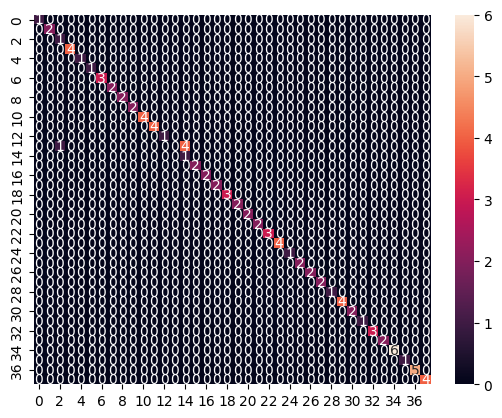

In [29]:
sns.heatmap(cf_matrix,annot=True)

In [45]:
def getAccuracyFromKvalue(k):
    knn_clf=KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train,y_train)
    y_pred=knn_clf.predict(X_test)
    pred=knn_clf.predict(X_train)
    # Train Accuracy
    # print("Train Accuracy:",accuracy_score(y_train,pred))
    # Test Accuracy
    # print("Test Accuracy:",accuracy_score(y_test,y_pred))
    return accuracy_score(y_test,y_pred)

In [51]:
accuracy_list=[]
for i in range(1,100):
    accuracy_list.append(getAccuracyFromKvalue(i))

c:\Users\aumka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\aumka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated,

In [57]:
accuracy_list[-10:]

[0.11956521739130435,
 0.11956521739130435,
 0.11956521739130435,
 0.11956521739130435,
 0.11956521739130435,
 0.11956521739130435,
 0.10869565217391304,
 0.10869565217391304,
 0.10869565217391304,
 0.10869565217391304]

In [53]:
import matplotlib.pyplot as plt

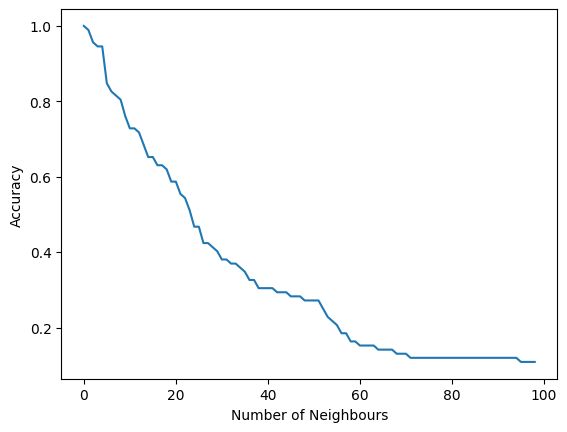

In [56]:
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.plot(accuracy_list)

In [67]:
import seaborn as sns

In [70]:
sns.barplot(x='Algorithms',y='Accuracy Scores',data=pd.DataFrame([94.56521739130434,85.86956521739131]))

ValueError: Could not interpret input 'Algorithms'